In [1]:
pip install dtale

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import dtale
from scipy.stats import linregress
from scipy import stats
from matplotlib.pyplot import figure

In [2]:
base = '../output/'

historical_prices_df = pd.read_csv(base + 'nasdaq_historical_prices.csv')
historical_prices_df = historical_prices_df.drop(columns='Unnamed: 0')
historical_prices_df

,Company,Q1 Date,Q1 Price,Q2 Date,Q2 Price,Q3 Date,Q3 Price
0,DOCU,2020-01-31,78.5100,2020-04-30,104.7500,2020-07-31,216.830000
1,ZM,2020-01-31,76.3000,2020-04-30,135.1700,2020-07-31,253.910000
2,DXCM,2019-12-31,218.7400,2020-03-31,269.2700,2020-06-30,405.400000
3,SPLK,2020-01-31,155.2600,2020-04-30,140.3600,2020-07-31,209.820000
4,SGEN,2019-12-31,114.2600,2020-03-31,115.3800,2020-06-30,169.920000
...,...,...,...,...,...,...,...
98,NVDA,2020-01-26,NaN,2020-04-26,NaN,2020-07-26,NaN
99,PAYX,2020-02-29,NaN,2020-05-31,NaN,2020-08-31,76.470001
100,KLAC,2019-12-31,175.6855,2020-03-31,142.4356,2020-06-30,193.646300
101,CSCO,2020-01-25,NaN,2020-04-25,NaN,2020-07-25,NaN


In [3]:
financial_ratios_df = pd.read_csv(base + 'nasdaq_financial_ratios.csv')
financial_ratios_df = financial_ratios_df.drop(columns='Unnamed: 0')
financial_ratios_df

,Company,Q1 P/E,Q2 P/E,Q3 P/E,Q1 ROE,Q2 ROE,Q3 ROE,Q1 Date,Q2 Date,Q3 Date
0,DOCU,-299.597287,-400.948571,-620.874031,-0.086774,-0.091441,-0.128634,2020-01-31,2020-04-30,2020-07-31
1,ZM,1191.100353,1473.689789,405.682498,0.018393,0.030029,0.155144,2020-01-31,2020-04-30,2020-07-31
2,DXCM,218.504035,1273.281759,849.326134,0.105031,0.021295,0.034198,2019-12-31,2020-03-31,2020-06-30
3,SPLK,-1064.434087,-72.359266,-127.625338,-0.011367,-0.168823,-0.156529,2020-01-31,2020-04-30,2020-07-31
4,SGEN,759.556952,-118.084957,-1390.521355,0.013767,-0.095379,-0.011681,2019-12-31,2020-03-31,2020-06-30
...,...,...,...,...,...,...,...,...,...,...
98,NVDA,156.637749,201.356865,419.415270,0.077925,0.070005,0.044703,2020-01-26,2020-04-26,2020-07-26
99,PAYX,77.441170,116.583405,130.569997,0.128451,0.079349,0.076153,2020-02-29,2020-05-31,2020-08-31
100,KLAC,73.227875,285.357774,73.578936,0.142543,0.034000,0.154292,2019-12-31,2020-03-31,2020-06-30
101,CSCO,71.068582,64.528627,74.669499,0.080995,0.077686,0.069515,2020-01-25,2020-04-25,2020-07-25


In [4]:
financial_growth_df = pd.read_csv(base + 'nasdaq_financial_growth.csv')
dtale.show(financial_growth_df, ignore_duplicate=True)

In [5]:
nasdaq_df = historical_prices_df.merge(financial_ratios_df, how='outer', on=['Company', 'Q1 Date', 'Q2 Date', 'Q3 Date'])

dtale.show(nasdaq_df, ignore_duplicate=True)

In [6]:
clean_nasdaq_df = nasdaq_df.merge(financial_growth_df, how='outer', on=['Company', 'Q1 Date', 'Q2 Date', 'Q3 Date'])

In [7]:
# remove [SIRI BIDU INTC TCOM] from df

clean_nasdaq_df = clean_nasdaq_df.loc[(clean_nasdaq_df['Company'] != 'BIDU') & (clean_nasdaq_df['Company'] != 'SIRI')
                                     & (clean_nasdaq_df['Company'] != 'INTC') & (clean_nasdaq_df['Company'] != 'TCOM')]

clean_nasdaq_df = clean_nasdaq_df.reset_index(drop=True)

# change price to that 12/27/19
clean_nasdaq_df.loc[50, 'Q1 Price'] = 72.449997

# change price to that 3/27/20
clean_nasdaq_df.loc[50, 'Q2 Price'] = 61.935001

# change price to that of 6/26/20
clean_nasdaq_df.loc[50, 'Q3 Price'] = 88.407501

dtale.show(clean_nasdaq_df, ignore_duplicate=True)

In [8]:
clean_nasdaq_df = clean_nasdaq_df.dropna()
clean_nasdaq_df = clean_nasdaq_df.reset_index(drop=True)

In [9]:
dtale.show(clean_nasdaq_df, ignore_duplicate=True)

### 

In [10]:
big_tech_df = clean_nasdaq_df.loc[(clean_nasdaq_df['Company'] == 'FB') | (clean_nasdaq_df['Company'] == 'AMZN') |  
                                  (clean_nasdaq_df['Company'] == 'AAPL') | 
                                  (clean_nasdaq_df['Company'] == 'MSFT') | 
                                  (clean_nasdaq_df['Company'] ==  'NFLX') | 
                                  (clean_nasdaq_df['Company'] == 'GOOG')]

big_tech_df = big_tech_df.reset_index(drop=True)
dtale.show(big_tech_df, ignore_duplicate=True)

In [33]:
# add price changes as percentage for NASDAQ
for index, row in clean_nasdaq_df.iterrows():
    clean_nasdaq_df.loc[index, 'Q1 Price Change'] =  100 * (row['Q1 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    clean_nasdaq_df.loc[index, 'Q2 Price Change'] =  100 * (row['Q2 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    clean_nasdaq_df.loc[index, 'Q3 Price Change'] =  100 * (row['Q3 Price'] - row['Q2 Price'])/(row['Q2 Price'])

clean_nasdaq_df.to_csv('../output/clean_nasdaq_df.csv')
dtale.show(clean_nasdaq_df, ignore_duplicate=True)

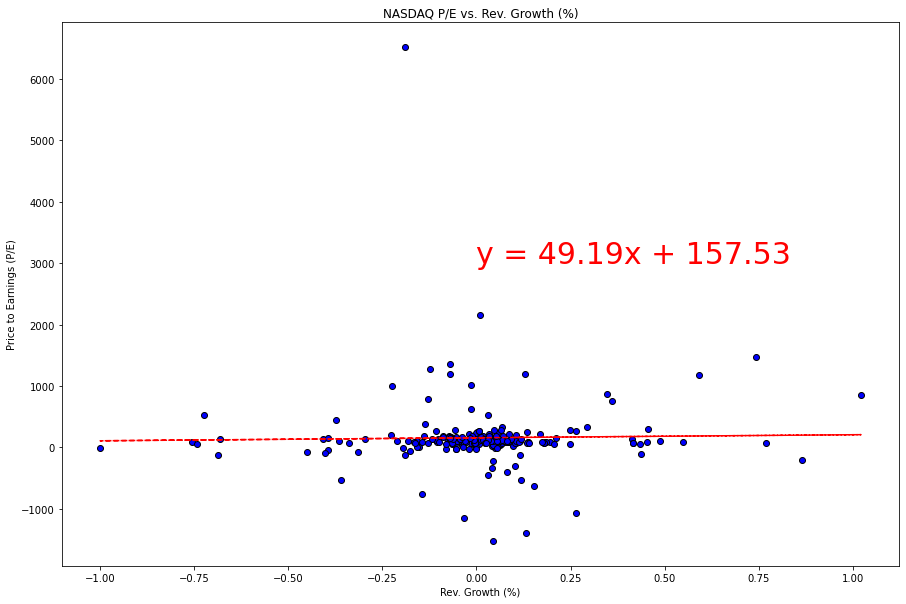

The r-value is: 0.020768396239956997


In [76]:
q1_rev = clean_nasdaq_df["Q1 Rev Growth"].to_list()
q2_rev = clean_nasdaq_df["Q2 Rev Growth"].to_list()
q3_rev = clean_nasdaq_df["Q3 Rev Growth"].to_list()

q1_pe = clean_nasdaq_df["Q1 P/E"].to_list()
q2_pe = clean_nasdaq_df["Q2 P/E"].to_list()
q3_pe = clean_nasdaq_df["Q3 P/E"].to_list()

# removes the largest outliers in the dataset
q3_rev.remove(max(q3_rev))
q3_pe.remove(q3_pe[q3_rev.index(max(q3_rev))])
q3_rev.remove(q3_rev[q3_pe.index(max(q3_pe))])
q3_pe.remove(max(q3_pe))

rev_growth = q1_rev + q2_rev + q3_rev
pe_ratios = q1_pe + q2_pe + q3_pe 

x_values = np.array(rev_growth)
y_values = np.array(pe_ratios)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.subplots(figsize=(15, 10))
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq,(0,3000),fontsize=30, color="red")
plt.scatter(x_values, y_values, edgecolors="black", facecolors="blue")
plt.xlabel("Rev. Growth (%)")
plt.ylabel("Price to Earnings (P/E)")
plt.title("NASDAQ P/E vs. Rev. Growth (%)")
plt.savefig("../graphs/nasdaq_rev_pe.png")
plt.show()
print(f"The r-value is: {r_value}")
#print("R-squared: %f" % r_value**2)

### Analysis ###